In [1]:
%matplotlib ipympl

In [2]:
import nilmtk
from nilmtk.timeframe import TimeFrame

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
TRAINING_DATA_DURATION = 12
delta_time = pd.to_timedelta(TRAINING_DATA_DURATION, unit='h')

# Building 1

In [5]:
redd = nilmtk.DataSet("redd.h5")

In [6]:
building_1 = redd.buildings[1].elec

In [7]:
building_1.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [8]:
building_1.available_ac_types('power')

['apparent', 'active']

In [9]:
building_1.submeters().available_ac_types('power')

['active']

In [10]:
building_1.submeters()

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=14, building=1, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(insta

In [11]:
# building_1.plot_when_on(on_power_threshold = 40)

### Main Meter

In [12]:
building_1.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [13]:
main_meter = building_1.mains()[1]

In [14]:
start_time = main_meter.get_timeframe().start
end_time = start_time + delta_time

In [15]:
print("Start Time:", start_time)
print("End Time:",   end_time)

Start Time: 2011-04-18 09:22:09-04:00
End Time: 2011-04-18 21:22:09-04:00


In [16]:
kw = {'sections': [TimeFrame(start=start_time, end=end_time)], 'sample_period': 3, 'resample': True}

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:09-04:00    225.283325
2011-04-18 09:22:12-04:00    222.349991
2011-04-18 09:22:15-04:00    222.853333
2011-04-18 09:22:18-04:00    222.706665
2011-04-18 09:22:21-04:00    222.646667
                                ...    
2011-04-18 21:21:54-04:00    139.929993
2011-04-18 21:21:57-04:00    139.446671
2011-04-18 21:22:00-04:00    140.023331
2011-04-18 21:22:03-04:00    140.406662
2011-04-18 21:22:06-04:00    142.940002
Freq: 3s, Name: (power, apparent), Length: 14400, dtype: float32
GOOD


<Axes: >

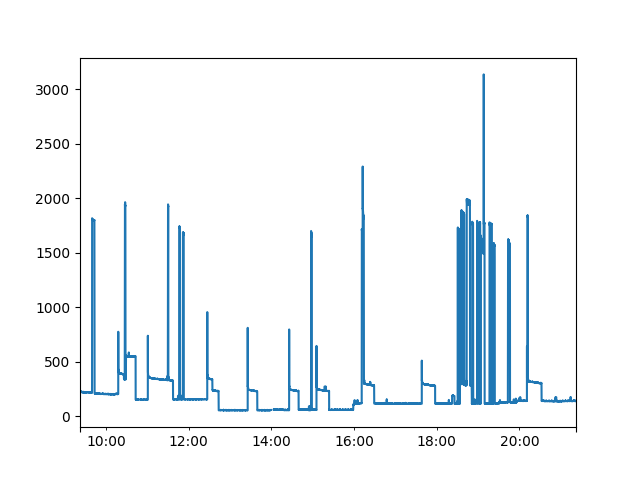

In [17]:
main_df = main_meter.power_series_all_data(**kw)
main_df.plot()

In [18]:
main_df = main_df.to_frame().fillna(0)

### Fridge

In [19]:
fridge = building_1['fridge']
fridge_df = fridge.power_series_all_data(**kw)
fridge_df.plot()

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:12-04:00    6.0
2011-04-18 09:22:15-04:00    6.0
2011-04-18 09:22:18-04:00    6.0
2011-04-18 09:22:21-04:00    6.0
2011-04-18 09:22:24-04:00    6.0
                            ... 
2011-04-18 21:21:54-04:00    7.0
2011-04-18 21:21:57-04:00    6.0
2011-04-18 21:22:00-04:00    6.0
2011-04-18 21:22:03-04:00    6.0
2011-04-18 21:22:06-04:00    6.0
Freq: 3s, Name: (power, active), Length: 14399, dtype: float32
GOOD


<Axes: >

In [20]:
fridge_df = fridge_df.to_frame().fillna(0)

### Microwave

In [21]:
microwave = building_1['microwave']
microwave_df = microwave.power_series_all_data(**kw)
microwave_df.plot()

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:12-04:00    5.0
2011-04-18 09:22:15-04:00    5.0
2011-04-18 09:22:18-04:00    5.0
2011-04-18 09:22:21-04:00    5.0
2011-04-18 09:22:24-04:00    5.0
                            ... 
2011-04-18 21:21:54-04:00    4.0
2011-04-18 21:21:57-04:00    4.0
2011-04-18 21:22:00-04:00    4.0
2011-04-18 21:22:03-04:00    4.0
2011-04-18 21:22:06-04:00    4.0
Freq: 3s, Name: (power, active), Length: 14399, dtype: float32
GOOD


<Axes: >

In [22]:
microwave_df = microwave_df.to_frame().fillna(0)

### Unknown

In [23]:
unknown = building_1['unknown']
unknown_df = unknown.power_series_all_data(**kw)
unknown_df.plot()

{'sections': [TimeFrame(start='2011-04-18 09:22:09-04:00', end='2011-04-18 21:22:09-04:00', empty=False)], 'sample_period': 3, 'resample': True}
2011-04-18 09:22:12-04:00    1.0
2011-04-18 09:22:15-04:00    1.0
2011-04-18 09:22:18-04:00    1.0
2011-04-18 09:22:21-04:00    1.0
2011-04-18 09:22:24-04:00    1.0
                            ... 
2011-04-18 21:21:54-04:00    1.0
2011-04-18 21:21:57-04:00    1.0
2011-04-18 21:22:00-04:00    1.0
2011-04-18 21:22:03-04:00    1.0
2011-04-18 21:22:06-04:00    1.0
Freq: 3s, Name: (power, active), Length: 14399, dtype: float32
GOOD


<Axes: >

In [24]:
unknown_df = unknown_df.to_frame().fillna(0)

# Combinatorial Optimization

In [25]:
# CO functions
from nilmtk.disaggregate.combinatorial_optimisation import CO

from nilmtk.feature_detectors import cluster
from nilmtk.disaggregate import Disaggregator
from nilmtk.datastore import HDFDataStore

## Step 1: Cluster

In [26]:
train_appliances = [('fridge', fridge_df),
                    ('unknown', unknown_df)
                   ]

In [27]:
import numpy as np
from nilmtk.feature_detectors.cluster import _transform_data, _apply_clustering

In [28]:
m_co = CO({})
max_num_states = 3

for appliance, readings in train_appliances:

    # Transform Data
    MAX_NUMBER_OF_SAMPLES = 2000
    MIN_NUMBER_OF_SAMPLES = 20
    DATA_THRESHOLD = 10

    data_above_thresh = readings[readings > DATA_THRESHOLD].dropna().values
    n_samples = len(data_above_thresh)
    if n_samples < MIN_NUMBER_OF_SAMPLES:
        data = np.zeros((MAX_NUMBER_OF_SAMPLES, 1))
    elif n_samples > MAX_NUMBER_OF_SAMPLES:
        # Randomly subsample (we don't want to smoothly downsample
        # because that is likely to change the values)
        random_indices = np.random.randint(0, n_samples, MAX_NUMBER_OF_SAMPLES)
        resampled = data_above_thresh[random_indices]
        data = resampled.reshape(MAX_NUMBER_OF_SAMPLES, 1)
    else:
        data = data_above_thresh.reshape(n_samples, 1)

    # Find clusters
    centroids = _apply_clustering(data, max_num_states, exact_num_clusters = None)
    centroids = np.append(centroids, 0)  # add 'off' state
    centroids = np.round(centroids).astype(np.int32)
    centroids = np.unique(centroids)  # np.unique also sorts

    m_co.model.append({
        'states': centroids,
        'appliance_name': appliance})

In [29]:
m_co.model

[{'states': array([  0, 193, 425], dtype=int32), 'appliance_name': 'fridge'},
 {'states': array([   0,   13, 1618], dtype=int32),
  'appliance_name': 'unknown'}]

## Step 2: Export Model

In [30]:
import pickle

In [31]:
def export_model(model, filename):
    example_dict = model
    with open(filename, "wb") as pickle_out:
        pickle.dump(example_dict, pickle_out)

In [32]:
export_model(m_co, 'm_co.pickle')

## Step 3: Import Model

In [33]:
def import_model(filename):
    with open(filename, "rb") as pickle_in:
        model = pickle.load(pickle_in)
    return model

In [34]:
m_co_load = import_model('m_co.pickle')

## Step 4: Testing

In [35]:
from sklearn.utils.extmath import cartesian

In [36]:
centroids = [model['states'] for model in m_co.model]
state_combinations = cartesian(centroids)

In [37]:
# All clustered states
centroids

[array([  0, 193, 425], dtype=int32), array([   0,   13, 1618], dtype=int32)]

In [38]:
# All possible combinations
state_combinations

array([[   0,    0],
       [   0,   13],
       [   0, 1618],
       [ 193,    0],
       [ 193,   13],
       [ 193, 1618],
       [ 425,    0],
       [ 425,   13],
       [ 425, 1618]], dtype=int32)

In [39]:
app_df_predicted = m_co.disaggregate_chunk([main_df])[0]

...............CO disaggregate_chunk running.............
Estimating power demand for 'unknown'

In [40]:
fridge_df_predicted = app_df_predicted['fridge']
unknown_df_predicted = app_df_predicted['unknown']

In [41]:
# Plot Fridge
fig = plt.figure(figsize=(10, 7))
plt.plot(main_df, label = 'Main Meter')
plt.plot(fridge_df, label = 'Fridge (Ground Truth)')
plt.plot(fridge_df_predicted, label = 'Fridge (Predicted)')

plt.title("Main Meter and Fridge (Ground Truth)")
plt.legend()
plt.ylabel("Active Power (W)")
plt.xlabel("Timestamp")

Text(0.5, 0, 'Timestamp')

In [42]:
# Plot Unknown
fig = plt.figure(figsize=(10, 7))
plt.plot(main_df, label = 'Main Meter')
plt.plot(unknown_df, label = 'Unknown (Ground Truth)')
plt.plot(unknown_df_predicted, label = 'Unknown (Predicted)')

plt.title("Main Meter and Unknown (Ground Truth)")
plt.legend()
plt.ylabel("Active Power (W)")
plt.xlabel("Timestamp")

Text(0.5, 0, 'Timestamp')

## Evaluation Metrics

In [43]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [44]:
def rmse(gt,pred):
    val = np.sqrt(mean_squared_error(gt,pred))
    return val

In [45]:
metrics = [mean_squared_error, rmse, mean_absolute_error, mean_absolute_percentage_error]
metrics_label = ['MSE','RMSE' ,'MAE', 'MAPE']

In [46]:
# Show metrics
for metric,lbl in zip(metrics,metrics_label):
    try:
        loss_function = metric
    except:
        print ("Loss function ",metric, " is not supported currently!")
        continue

    error = {}
    error['fridge'] = loss_function(fridge_df, fridge_df_predicted[1:])

    error = pd.Series(error)
    computed_metric = pd.DataFrame(error)
    print("............ " , lbl ," ..............")
    print(computed_metric.to_string(header=False))

............  MSE  ..............
fridge  22880.96875
............  RMSE  ..............
fridge  151.264565
............  MAE  ..............
fridge  118.591225
............  MAPE  ..............
fridge  16.102259
